Import libs

In [122]:
import numpy as np
from collections import namedtuple
import seaborn as sns
import matplotlib.pylab as plt
import opencv as cv2

ModuleNotFoundError: No module named 'opencv'

import files

In [106]:
def readFile(fileName):
    with open(fileName) as f:
        content = f.read().strip().split('\n')
    content = list(map(float, content))
    return content
raw_data1 = readFile('raw_data1.csv')
print(raw_data1[:10])

[0.27487517124106364, 0.8688041235522252, 0.8077291728342105, 0.21103608963479847, 1.7394879595609734, -1.5581880329009654, 0.1839801870903324, 0.24907801863966186, -0.8590584471058333, -0.4833798020207924]


In [107]:
no_of_samples = 18000
raw_sampling_rate =1080 *10**3
rpm = 12
beam_width =2
prf = 1800
sigma = 1
no_of_range_slots = 30



In [108]:
slot_time = 1/(prf*no_of_range_slots)
down_sampling_rate =1/slot_time
sampling_rate = int(raw_sampling_rate/down_sampling_rate)
no_of_down_samples = no_of_samples/sampling_rate
no_of_beams = int(no_of_down_samples/no_of_range_slots)
samples_per_beam = no_of_range_slots*sampling_rate
print("number of don samples", no_of_down_samples, "number of beams", no_of_beams)

number of don samples 900.0 number of beams 30


In [109]:
raw_samples_in_beam = []
for i in range(no_of_beams):
    raw_samples_in_beam.append(raw_data1[i*samples_per_beam:(i+1)*samples_per_beam])

print(raw_samples_in_beam[0][:10])


[0.27487517124106364, 0.8688041235522252, 0.8077291728342105, 0.21103608963479847, 1.7394879595609734, -1.5581880329009654, 0.1839801870903324, 0.24907801863966186, -0.8590584471058333, -0.4833798020207924]


In [110]:
data_matrix =[]
u_matrix =[]
for i in range(no_of_beams):
    data_raw = []
    u_raw = []
    
    for j in range(0,len(raw_samples_in_beam[i]), sampling_rate):
        data_raw.append(raw_samples_in_beam[i][j])
        l = max(0, j-20)
        r= min(len(raw_samples_in_beam[i]), j+21)
        lg = max(0, j-2)
        rg = min(len(raw_samples_in_beam[i]), j+3)
        u = np.mean(raw_samples_in_beam[i][l:lg] + raw_samples_in_beam[i][rg:r])
        u_raw.append(u)
    data_matrix.append(data_raw)
    u_matrix.append(u_raw)

data_matrix = np.array(data_matrix)
u_matrix = np.array(u_matrix)
    
        

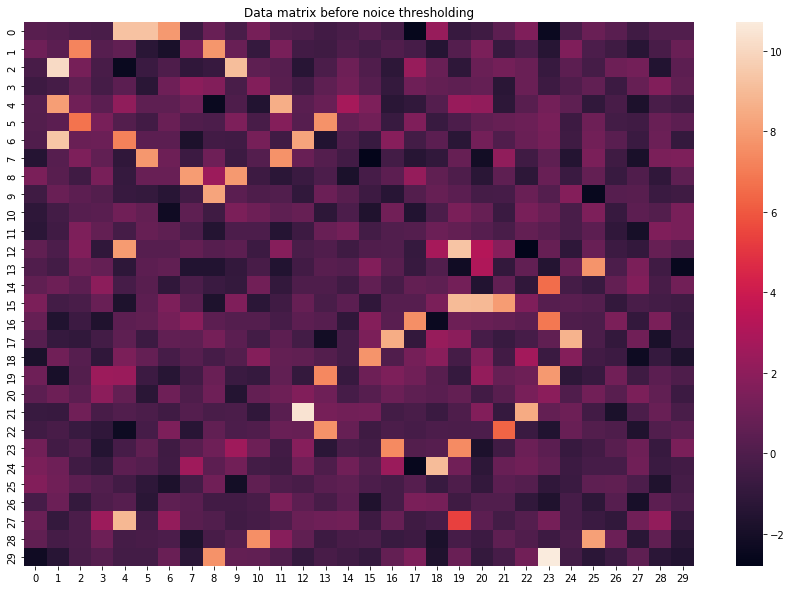

In [119]:

fig, ax = plt.subplots(figsize=(15,10)) 
plt.title("Data matrix before noice thresholding")
ax = sns.heatmap(data_matrix, linewidth=0,ax=ax)
plt.show()

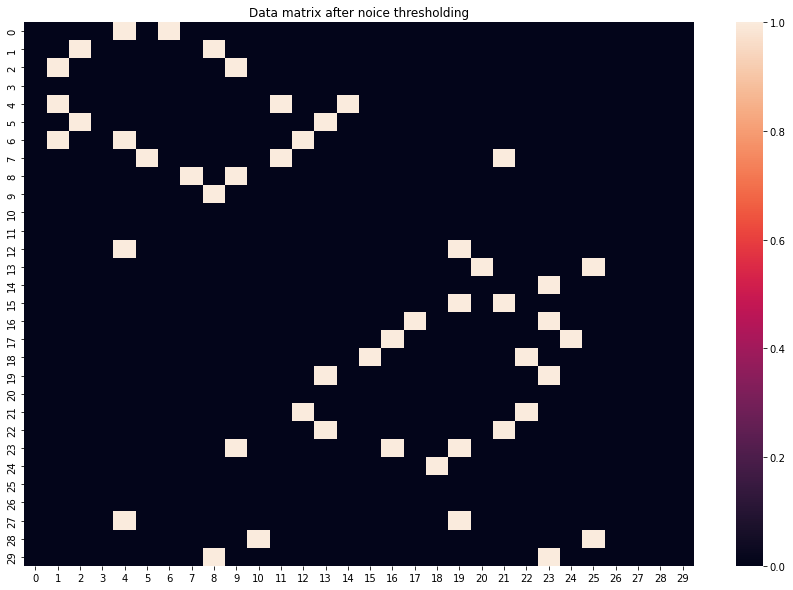

In [121]:
k = 2.5
binary_matrix = np.array([[1 if data_matrix[i][j] > u_matrix[i][j]  + k else 0 for j in range(len(data_matrix[i]))] for i in range(len(data_matrix))])
fig, ax = plt.subplots(figsize=(15,10)) 
plt.title("Data matrix after noice thresholding")
ax = sns.heatmap(binary_matrix, linewidth=0,ax=ax)
plt.show()
